### Bibliotecas

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import binom

-----------------------------------------------------------------
### Parte 1

#### Função de Distribuição Cumulativa - Distribuição Exponencial - Variáveis Discretas ou Contínuas

$F_X (x) = \Bigg\{$ 
$\begin{gather*} 
1 - e^{(-\lambda x)}\textrm{, }x\geq0\textrm{ e }\lambda>0\\
0\textrm{, caso contrário}
\end{gather*}$

In [2]:
def exp_cdf_eq(lam, x):
    if(x>=0 and lam>0):
        return 1-np.exp(-lam*x)
    else:
        return 0;

In [3]:
def exp_cdf(dados, va_discreta):
    dados.sort()
    lam = 0.5;
    y_vals1 = np.array([exp_cdf_eq(lam, x) for x in dados])
    lam = 1;
    y_vals2 = np.array([exp_cdf_eq(lam, x) for x in dados])
    lam = 1.5;
    y_vals3 = np.array([exp_cdf_eq(lam, x) for x in dados])

    fig, ax = plt.subplots(figsize=(10,5))
    
    if va_discreta:
        ax.step(dados, y_vals1, label="\u03BB=0.5", marker="o", linestyle='-',where='post')
        ax.step(dados, y_vals2, label="\u03BB=0.5", marker="o", linestyle='--',where='post')
        ax.step(dados, y_vals3, label="\u03BB=0.5", marker="o", linestyle=':',where='post')
        ax.set_title("Função de Distribuição Cumulativa - Distribuição Exponencial - V.A. discreta")
    else:
        ax.plot(dados, y_vals1, label="\u03BB = 0.5", linestyle='-')
        ax.plot(dados, y_vals2, label="\u03BB = 1.0", linestyle='--')
        ax.plot(dados, y_vals3, label="\u03BB = 1.5", linestyle=':')
        ax.set_title("Função de Distribuição Cumulativa - Distribuição Exponencial - V.A. contínua")
    
    ax.set_xlabel('x')
    ax.set_ylabel("P(X <= x)")
    plt.legend()
    plt.show()

#### Utilizando CDF

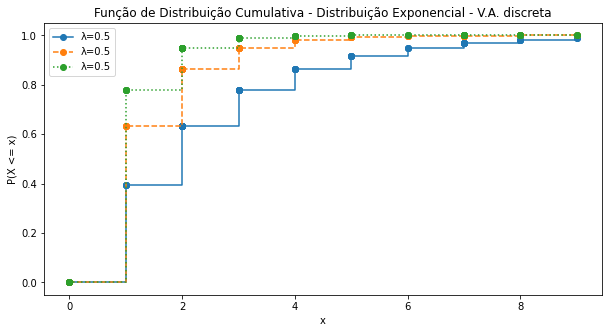

In [96]:
va_discreta = True
cdf_dataset = np.random.randint(0,10,50)
exp_cdf(cdf_dataset, va_discreta)

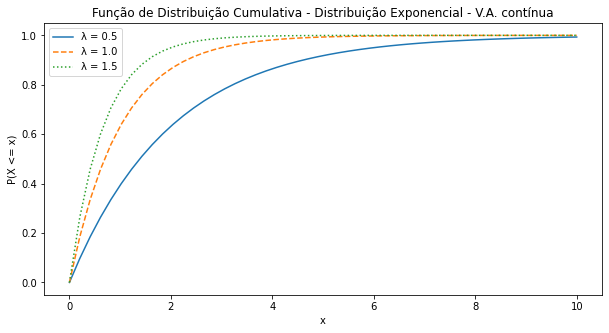

In [6]:
va_discreta = False
cdf_dataset = np.linspace(0,10,50)
exp_cdf(cdf_dataset, va_discreta)

#### Função de Distribuição Cumulativa - Variáveis Discretas ou Contínuas

In [117]:
def cdf(dados,va_discreta):
    if va_discreta:
        num_bins=10
        hx, hy, _ = plt.hist(dados, bins=num_bins, density=True, cumulative=True, histtype='step')
        plt.close()
        dx = hy[1] - hy[0]
        F1 = np.cumsum(hx)*dx
        fig, ax = plt.subplots(figsize=(10,5))
        ax.step(hy[1:], hx, '--o', where="post")
        ax.set_title('Função de Distribuição Cumulativa - V.A. discreta')
        ax.set_xlabel("x")
        ax.set_ylabel("P(X <= x)")
        plt.show()
    else:
        dx = dados[2]-dados[1]
        y  = 0.25*np.exp((-dados ** 2)/8)
        y=y/ (np.sum(dx * y))
        cdf = np.cumsum(y * dx)
        plt.plot(dados,cdf)
        plt.xlabel("x")
        plt.ylabel("P(X <= x)")
        plt.title("Função de Distribuição Cumulativa - V.A. contínua")
        plt.show()

#### Utilizando CDF

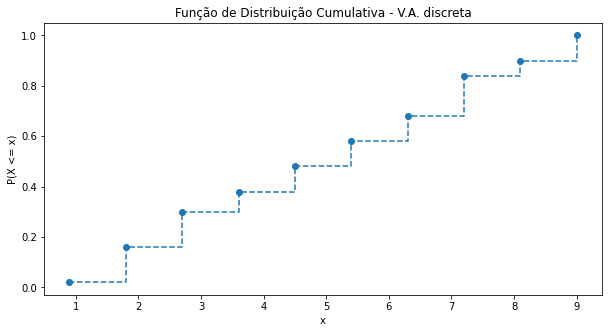

In [118]:
va_discreta = True
cdf_dataset = np.random.randint(0,10,50)
cdf(cdf_dataset,va_discreta)

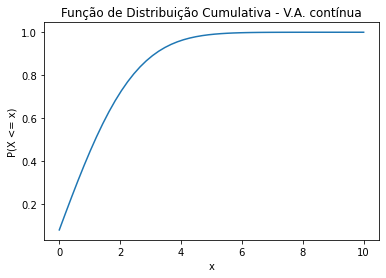

In [104]:
cdf_dataset = np.linspace(0,10,50)
va_discreta = False
cdf(cdf_dataset,va_discreta)

#### Função de Massa de Probabilidade - Variáveis Discretas

Associa cada valor de uma v.a. (eixo x) a uma probabilidade (eixo y)

In [8]:
def pmf(dados):
    val, cnt = np.unique(dados, return_counts=True)
    pmf = cnt / len(dados)
    # values along with probability mass function
    np.column_stack((val, pmf))
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.plot(val, pmf, 'k^')
    ax.vlines(val, 0, pmf, colors='k', linestyles='-', lw=1)
    ax.set_title("Função de Massa de Probabilidade")
    ax.set_xlabel('x')
    ax.set_ylabel("P(x)")
    plt.show()

#### Utilizando PMF

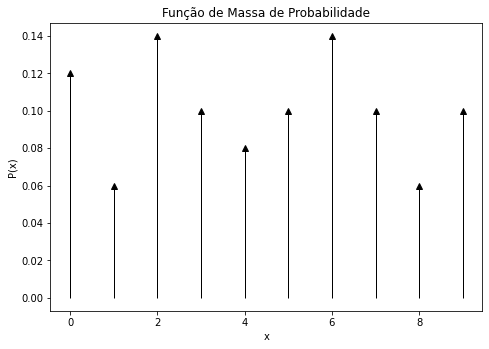

In [9]:
pmf_dataset = np.random.randint(0,10,50)
pmf(pmf_dataset)

#### Função Densidade de Probabilidade - Distribuição Exponencial - Variáveis Contínuas (EXTRA)

$f_X (x) = \Bigg\{$ 
$\begin{gather*} 
e^{(-\lambda x)}\textrm{, }x\geq0\textrm{ e }\lambda>0\\
0\textrm{, caso contrário}
\end{gather*}$

In [10]:
def exp_pdf_eq(lam, x):
    if(x>=0 and lam>0):
        return np.exp(-lam*x)
    else:
        return 0;

In [11]:
def exp_pdf(dados):
    lam = 0.5;
    y_vals1 = np.array([exp_pdf_eq(lam, x) for x in dados])
    lam = 1;
    y_vals2 = np.array([exp_pdf_eq(lam, x) for x in dados])
    lam = 1.5;
    y_vals3 = np.array([exp_pdf_eq(lam, x) for x in dados])

    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(dados, y_vals1, label="\u03BB=0.5", linestyle='-')
    ax.plot(dados, y_vals2, label="\u03BB=1.0", linestyle='--')
    ax.plot(dados, y_vals3, label="\u03BB=1.5", linestyle=':')
    ax.set_title("Função de Massa de Probabilidade - Distribuição Exponencial - V.A. Contínua")
    ax.set_xlabel('x')
    ax.set_ylabel("P(X <= x)")
    plt.legend()

#### Utilizando a função PDF

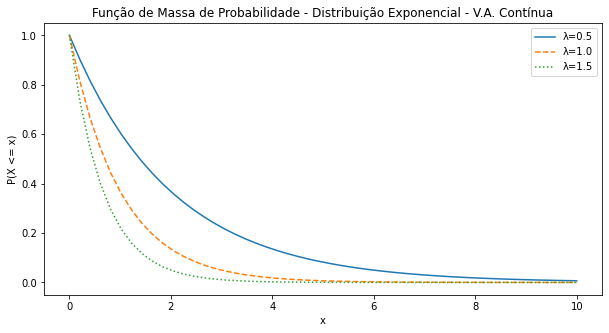

In [13]:
pdf_dataset = np.linspace(0,10,50)
exp_pdf(pdf_dataset)

-----------------------------------------------------------------
### Parte 2

#### CDF

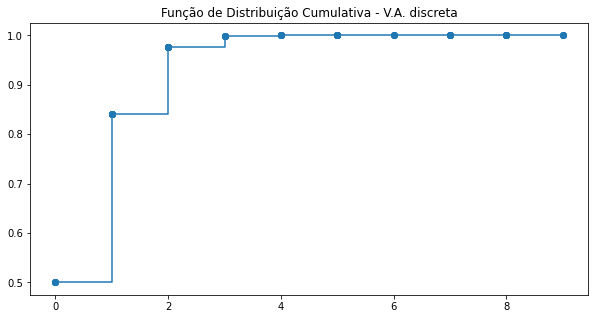

In [119]:
cdf_dataset = np.random.randint(0,10,50)
cdf_dataset.sort()
y = norm.cdf(cdf_dataset)
plt.subplots(figsize=(10,5))
plt.step(cdf_dataset, y, marker="o", where='post')
plt.title('Função de Distribuição Cumulativa - V.A. discreta')
plt.show()

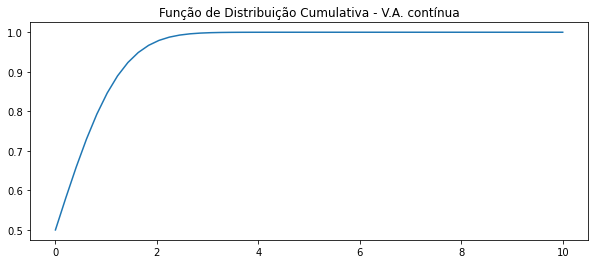

In [120]:
cdf_dataset = np.linspace(0,10,50)
y = norm.cdf(cdf_dataset)
plt.subplots(figsize=(10,4))
plt.plot(cdf_dataset, y)
plt.title('Função de Distribuição Cumulativa - V.A. contínua')
plt.show()

#### PDF

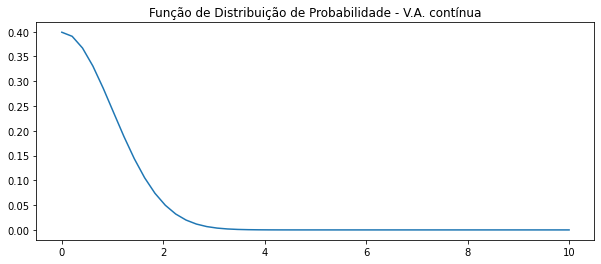

In [121]:
pdf_dataset = np.linspace(0,10,50)
y = norm.pdf(pdf_dataset)
plt.subplots(figsize=(10,4))
plt.plot(pdf_dataset, y)
plt.title('Função de Distribuição de Probabilidade - V.A. contínua')
plt.show()

#### PMF - Distribuição Binomial

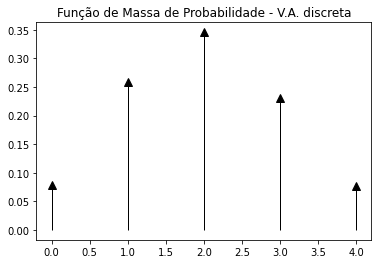

In [122]:
fig, ax = plt.subplots(1, 1)
# Calculate a few first moments:
n, p = 5, 0.4
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

# Display the probability mass function (pmf):
x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'k^', ms=8)

# Alternatively, the distribution object can be called (as a function) to fix the shape and location. This returns a “frozen” RV object holding the given parameters fixed. Freeze the distribution and display the frozen pmf:
rv = binom(n, p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1)
plt.title('Função de Massa de Probabilidade - V.A. discreta')
plt.show()